In [3]:
!pip install yfinance


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [8]:
import numpy as np
import pandas as pd

import yfinance as yf
import pandas_datareader as pdr

import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

### 1. Understanding Data-Driven Decisions data pulls

In [9]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2025; month= 6; day=2
Period for indexes: 1955-06-02 to 2025-06-02 


### 1.1. GDP

In [10]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)

In [11]:
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
gdppot.tail(15)

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2021-10-01,21606.08076,0.020390,0.005260
2022-01-01,21722.02480,0.020882,0.005366
2022-04-01,21840.56636,0.021403,0.005457
2022-07-01,21961.53508,0.021799,0.005539
2022-10-01,22084.92536,0.022162,0.005618
2023-01-01,22208.24254,0.022384,0.005584
2023-04-01,22333.11239,0.022552,0.005623
2023-07-01,22459.74068,0.022685,0.005670
2023-10-01,22588.18459,0.022787,0.005719


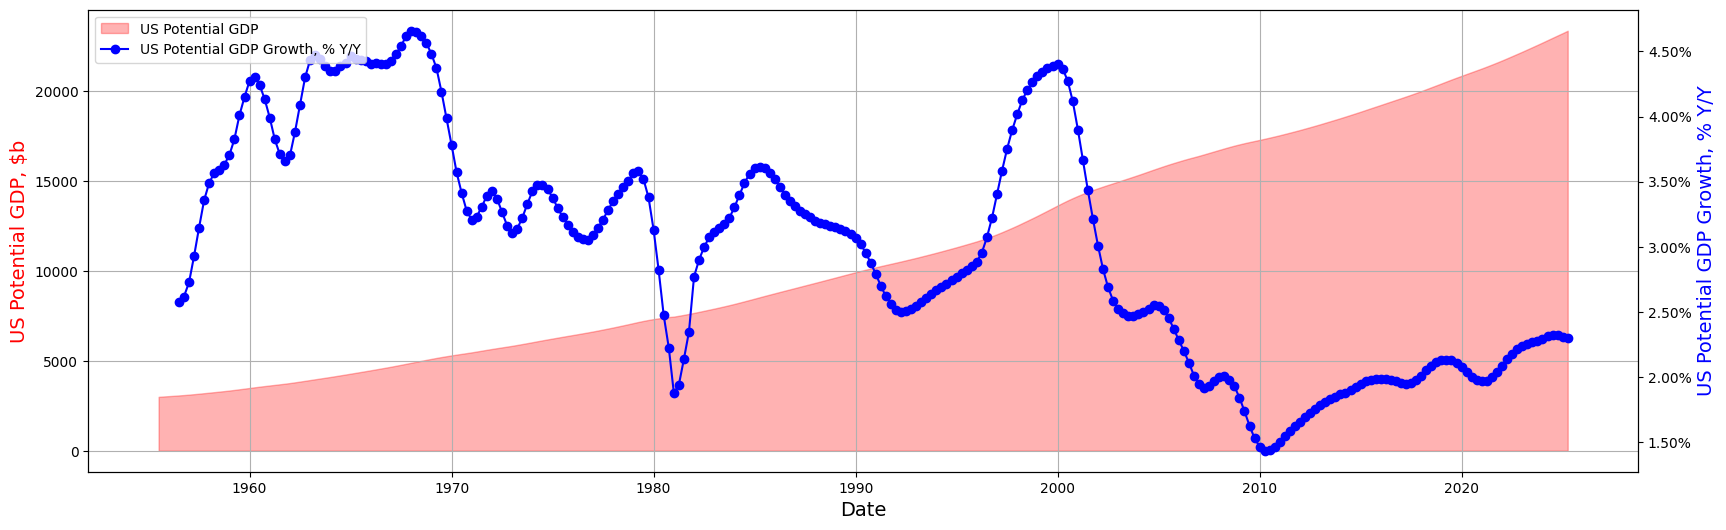

In [12]:
# Visuals GDPPOT
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

### 1.2. Inflation - CPI Core

In [13]:
# # "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)

In [14]:
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(13)

,CPILFESL,cpi_core_yoy,cpi_core_mom
DATE,,,
2024-04-01,317.596,0.036236,0.002633
2024-05-01,318.053,0.033905,0.001439
2024-06-01,318.343,0.032606,0.000912
2024-07-01,318.933,0.032283,0.001853
2024-08-01,319.839,0.032918,0.002841
2024-09-01,320.835,0.032899,0.003114
2024-10-01,321.688,0.032928,0.002659
2024-11-01,322.619,0.032801,0.002894
2024-12-01,323.296,0.032136,0.002098


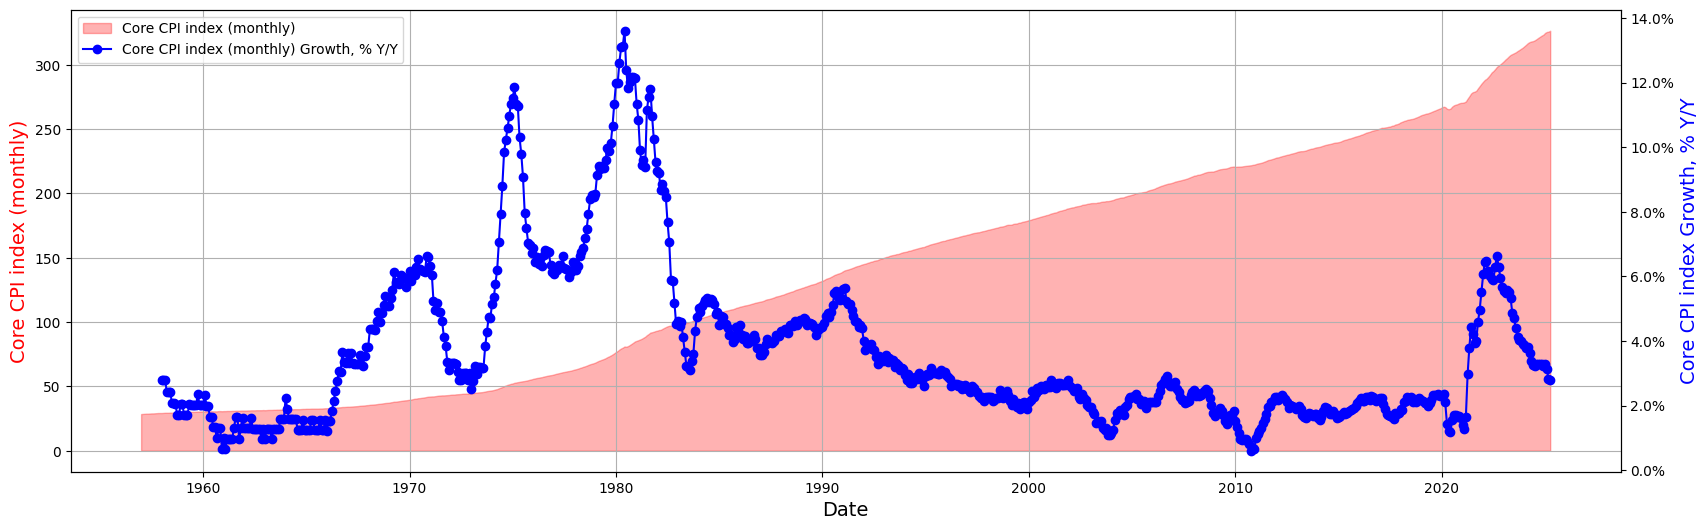

In [15]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

ax.fill_between(cpilfesl.index, cpilfesl.CPILFESL, color="red", alpha=0.3, label="Core CPI index (monthly)")

ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_core_yoy, color="blue", marker="o", label="Core CPI index (monthly) Growth, % Y/Y")

ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Core CPI index (monthly)", color="red", fontsize=14)
ax2.set_ylabel("Core CPI index Growth, % Y/Y", color="blue", fontsize=14)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

### 1.3 Interest rates

In [16]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail(10)

,FEDFUNDS
DATE,
2024-07-01,5.33
2024-08-01,5.33
2024-09-01,5.13
2024-10-01,4.83
2024-11-01,4.64
2024-12-01,4.48
2025-01-01,4.33
2025-02-01,4.33
2025-03-01,4.33


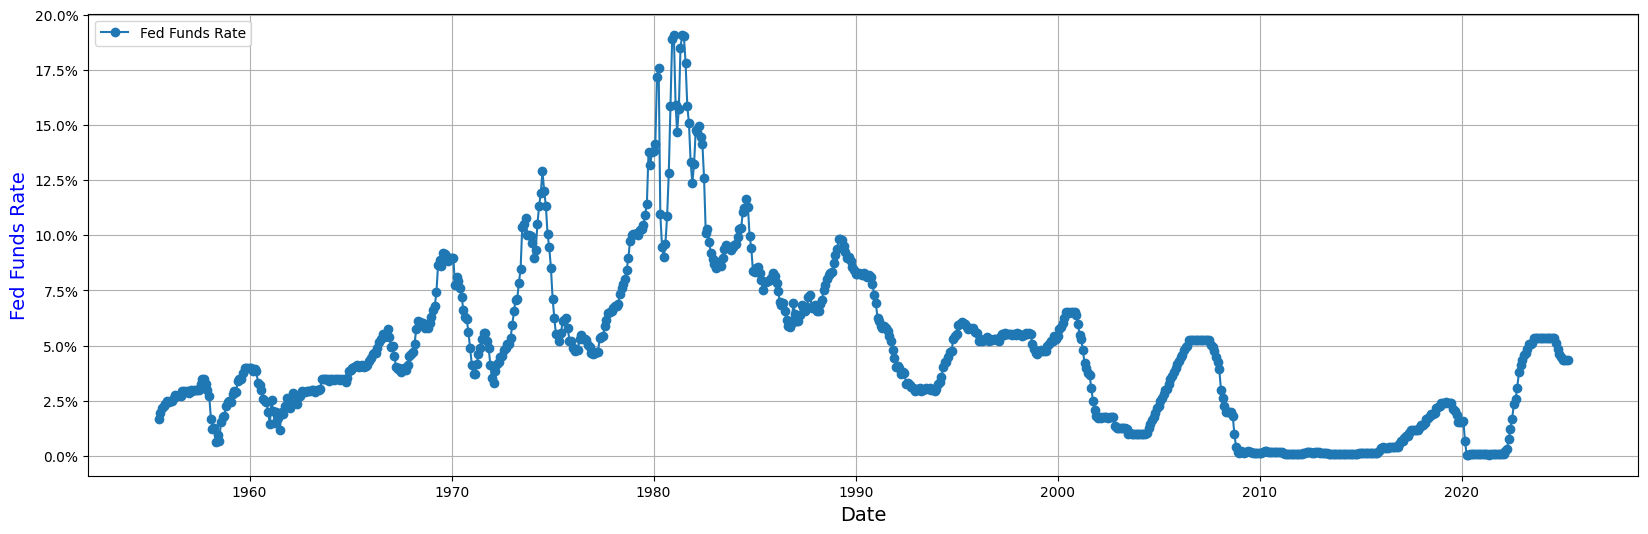

In [17]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(fedfunds.index, fedfunds.FEDFUNDS/100, marker="o", label="Fed Funds Rate")

ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Fed Funds Rate", color="blue", fontsize=14)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

In [18]:
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail()

,DGS1
DATE,
2025-05-23,4.15
2025-05-26,NaN
2025-05-27,4.14
2025-05-28,4.16
2025-05-29,4.13


In [19]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail()

,DGS5
DATE,
2025-05-23,4.08
2025-05-26,NaN
2025-05-27,4.04
2025-05-28,4.05
2025-05-29,4.00
